In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd
from datetime import datetime, timedelta
import pickle
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast

set_log_level("ERROR")

In [2]:
delta = timedelta(
    minutes=30,
)
# Read SR and EQ data
df = read_data("data/SR_table_EarthQuake_v3_std.mat")
arrays = (
    pd.DataFrame(df["NS_mean"])
    .applymap(lambda x: np.array(x, dtype=np.float32))
    .to_numpy()
)
# Adatpt to NeuralProphet input data
NS_mean = np.array(np.stack([np.stack(a[0].squeeze()) for a in arrays]))
# Create datetime Array
pd.date_range(start="2018-09-09", end="2020-02-02")
ds = pd.date_range(start="2016-01-01", end="2021-01-01", freq="30min")

In [3]:
# Convert 0,1 column to EQ events
# events_eq = ds[earthquake_raw > 0.0]

# Create the prior dataframe
df_regressor = pd.DataFrame(
    {
        "ds": ds,
        "S0": NS_mean[:, 0],
        "S1": NS_mean[:, 1],
        "S2": NS_mean[:, 2],
        "S3": NS_mean[:, 3],
        "S4": NS_mean[:, 4],
        "S5": NS_mean[:, 5],
        "S6": NS_mean[:, 6],
        "S7": NS_mean[:, 7],
        "S8": NS_mean[:, 8],
        "S9": NS_mean[:, 9],
    }
)

In [4]:
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast

config_npw_d = {
    "forecast_length": timedelta(hours=24),
    "freq": timedelta(minutes=30),
    "question_mark_length": timedelta(hours=24),
    "num_hidden_layers": 2,
    "learning_rate": 0.05,
    "n_lags": 48,
    "d_hidden": 16,
}
config_npw = ConfigNPw(**config_npw_d)

ConfigEQ_d = {
    "mag_array": df["mag"].to_numpy(),
    "dist_array": df["dist"].to_numpy(),
    "lat_array": df["lat"].to_numpy(),
    "arc_array": df["arc"].to_numpy(),
    "dist_start": 4000,
    "dist_delta": 2000,
    "dist_max": 6000,
    "lat_max": 360,
    "arc_max": 60,
    "mag_start": 0.5,
    "mag_delta": 1,
    "dist_perct": 1000,
}
config_events = ConfigEQ(**ConfigEQ_d)

In [5]:
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast

config_npw_d = {
    "forecast_length": timedelta(hours=24),
    "freq": timedelta(minutes=30),
    "question_mark_length": timedelta(hours=24),
    "num_hidden_layers": 2,
    "learning_rate": 0.01,
    "n_lags": 5 * 48,
    "d_hidden": 16,
}
config_npw = ConfigNPw(**config_npw_d)

ConfigEQ_d = {
    "mag_array": df["mag"].to_numpy(),
    "dist_array": df["dist"].to_numpy(),
    "lat_array": df["lat"].to_numpy(),
    "arc_array": df["arc"].to_numpy(),
    "dist_start": 4000,
    "dist_delta": 2000,
    "dist_max": 6000,
    "lat_max": 360,
    "arc_max": 60,
    "mag_start": 0.5,
    "mag_delta": 1,
    "dist_perct": 1000,
}
config_events = ConfigEQ(**ConfigEQ_d)

In [ ]:
import requests
from dateutil.relativedelta import *

hours_offsets = [-3 * 24, 6, 12]
event_offsets = [None, -timedelta(hours=6), -timedelta(hours=12)]
# start_day  = datetime.fromisoformat('2018-01-01T10:00:00');
days = list(range(3))
start_day = datetime.fromisoformat("2019-01-01T10:00:00")
n_months = 1
sites = list()
for i in range(n_months):
    start_date = start_day + i * relativedelta(months=+1)
    sites.append(start_date)


def NPw_parallel(start_day):
    NPw_o = NPw(config_npw, df_regressor, config_events)
    day = NPw_o.get_next_event(start_day)
    test_metrics = NPw_o.predict_with_offset_hours(day, hours_offsets, event_offsets)
    NPw_o.save_df(day.strftime("%m_%d_%Y_%H_%M_%S"))
    return day.strftime("%m_%d_%Y_%H_%M_%S")  # test_metrics


for test_metrics in map(NPw_parallel, sites):
    print(test_metrics)

In [ ]:
from datetime import datetime, timedelta
from dateutil.relativedelta import *

start_day = datetime.fromisoformat("2018-01-01T10:00:00")
sites = []
for i in range(7):
    start_date = start_day + i * relativedelta(months=+6)
    print(start_date)
    sites.append(start_date)

days = datetime.fromisoformat("2017-01-01T10:00:00")
for index_delta in range(n_dates):
    start_date = days + index_delta * relativedelta(months=+6)
    print(start_date)
# sites = [(index_day * relativedelta(month=+6)) for index_day in days]
sites

In [8]:
NPw_o.save_df()

In [11]:
NPw_o.save_df()

In [16]:
event_offset = -timedelta(hours=24)
print(
    "EVENT: "
    + str(event_date)
    + " date: "
    + str(current_date)
    + " Offset: "
    + str(event_offset)
)
config_fc = ConfigForecast(start_forecast=current_date, offset_event=event_offset)
NPw_o.add_forecast(config_fc)

EVENT: 2018-01-04 10:30:00 date: 2018-01-04 22:30:00 Offset: -1 day, 0:00:00


Training: 0it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

0.63430256


In [17]:
event_offset = None
print(
    "EVENT: "
    + str(event_date)
    + " date: "
    + str(current_date)
    + " Offset: "
    + str(event_offset)
)
config_fc = ConfigForecast(start_forecast=current_date, offset_event=event_offset)
NPw_o.add_forecast(config_fc)

EVENT: 2018-01-04 10:30:00 date: 2018-01-04 22:30:00 Offset: None


Training: 0it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

0.5027072


In [278]:
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd
from datetime import datetime, timedelta
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast
from dateutil.relativedelta import *

import sys

set_log_level("ERROR")

delta = timedelta(minutes=30)
# Read SR and EQ data
df = read_data("NPdata.mat")
arrays = (
    pd.DataFrame(df["NS_mean"])
    .applymap(lambda x: np.array(x, dtype=np.float32))
    .to_numpy()
)
# Adatpt to NeuralProphet input data
NS_mean = np.array(np.stack([np.stack(a[0].squeeze()) for a in arrays]))
# Create datetime Array
pd.date_range(start="2018-09-09", end="2020-02-02")
ds = pd.date_range(start="2016-01-01", end="2021-01-01", freq="30min")
# Create the prior dataframe
df_regressor = pd.DataFrame(
    {
        "ds": ds,
        "S0": NS_mean[:, 0],
        "S1": NS_mean[:, 1],
        "S2": NS_mean[:, 2],
        "S3": NS_mean[:, 3],
        "S4": NS_mean[:, 4],
        "S5": NS_mean[:, 5],
        "S6": NS_mean[:, 6],
        "S7": NS_mean[:, 7],
        "S8": NS_mean[:, 8],
        "S9": NS_mean[:, 9],
    }
)

config_npw_d = {
    "forecast_length": timedelta(hours=24),
    "freq": timedelta(minutes=30),
    "question_mark_length": timedelta(hours=24),
    "num_hidden_layers": 2,
    "learning_rate": 0.01,
    "n_lags": 5 * 48,
    "d_hidden": 16,
    "verbose": False,
    "epochs": 1,
    "gpu": False,
}
config_npw = ConfigNPw(**config_npw_d)

ConfigEQ_d = {
    "mag_array": df["mag"].to_numpy(),
    "dist_array": df["dist"].to_numpy(),
    "lat_array": df["lat"].to_numpy(),
    "arc_array": df["arc"].to_numpy(),
    "dist_start": 4000,
    "dist_delta": 2000,
    "dist_max": 6000,
    "lat_max": 360,
    "arc_max": 60,
    "mag_start": 0.5,
    "mag_delta": 1,
    "dist_perct": 1000,
}
config_events = ConfigEQ(**ConfigEQ_d)

hours_offsets = [-3 * 24, 12, 24]
event_offsets = [None, -timedelta(hours=12), -timedelta(hours=24)]

NPw_o = NPw(config_npw, df_regressor, config_events)
NPw_o.get_df_from_folder("../Result/daily")

In [279]:
NPw_o.input_events.iloc[316]
83
55
32

32

In [281]:
df_out = NPw_o.get_metrics("MSE")
#df_out = df_out.loc[(df_out["dif_event"] == 72) |  (df_out["dif_event"] == 12) ]
len(df_out)

30

In [282]:
#NPw.print_df(df_out)

In [283]:
import sklearn
sklearn.metrics.confusion_matrix(df_out["correct_class"], df_out["predicted_class"])

array([[12,  9],
       [ 2,  7]], dtype=int64)

In [212]:
for i in range(1):
    print(i)

0


In [142]:
NPw.print_df(df_out.head())

,ref,error,correct_class,predicted_class,type,diff_metrics,n_classes,dates,dist,mag,arc,dif_event
date,,,,,,,,,,,,
2017-01-03 02:30:00,72.0,1.219793,0,1,FP,0.206315,2,2017-01-06 02:30:00,5.244188,5.0,0.900272,72.0
2017-01-06 14:30:00,-12.0,0.546593,1,1,TP,0.000000,2,2017-01-06 02:30:00,5.244188,5.0,0.900272,12.0
2017-01-07 02:30:00,-24.0,0.400393,1,0,FN,0.009468,2,2017-01-06 02:30:00,5.244188,5.0,0.900272,24.0
2017-02-27 11:00:00,72.0,0.980782,0,0,TN,0.000000,2,2017-03-02 11:00:00,3.605939,5.6,0.978400,72.0
2017-05-03 21:00:00,-13.0,0.024833,1,0,FN,0.000748,2,2017-05-03 08:30:00,4.231628,5.2,0.986692,12.0


In [138]:
df_out.columns

Index(['ref', 'error', 'correct_class', 'predicted_class', 'type',
       'diff_metrics', 'n_classes', 'dates', 'dist', 'mag', 'arc',
       'dif_event'],
      dtype='object')

In [188]:
import dalex as dx

import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')
data = df_out
X = data.drop(columns=["ref","diff_metrics",  "correct_class", "predicted_class", "n_classes", "dates", "type"])
print(X.columns)
y = (data["correct_class"] == data["predicted_class"]).astype(int)


X["dif_event"] = (X["dif_event"].astype(int))
NPw.print_df(X.head())

Index(['error', 'dist', 'mag', 'arc', 'dif_event'], dtype='object')


,error,dist,mag,arc,dif_event
date,,,,,
2017-01-03 02:30:00,1.219793,5.244188,5.0,0.900272,72
2017-01-06 14:30:00,0.546593,5.244188,5.0,0.900272,12
2017-01-07 02:30:00,0.400393,5.244188,5.0,0.900272,24
2017-02-27 11:00:00,0.980782,3.605939,5.6,0.978400,72
2017-05-03 21:00:00,0.024833,4.231628,5.2,0.986692,12


In [198]:
numerical_features = 'dist', 'mag', 'arc'
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median', fill_value=0)),
        ('scaler', StandardScaler())
    ]
)
categorical_features = ['dif_event']
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500, random_state=0)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])

In [199]:
clf.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('dist', 'mag', 'arc')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dif_event'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500,
                               random_state=0))])

In [200]:
exp = dx.Explainer(clf, X, y)

Preparation of a new explainer is initiated

  -> data              : 75 rows 5 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 75 values
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002979704CB80> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 5.94e-17, mean = 0.573, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.132, mean = -0.000124, max = 0.128
  -> model_info        : package sklearn

A new explainer has been created!


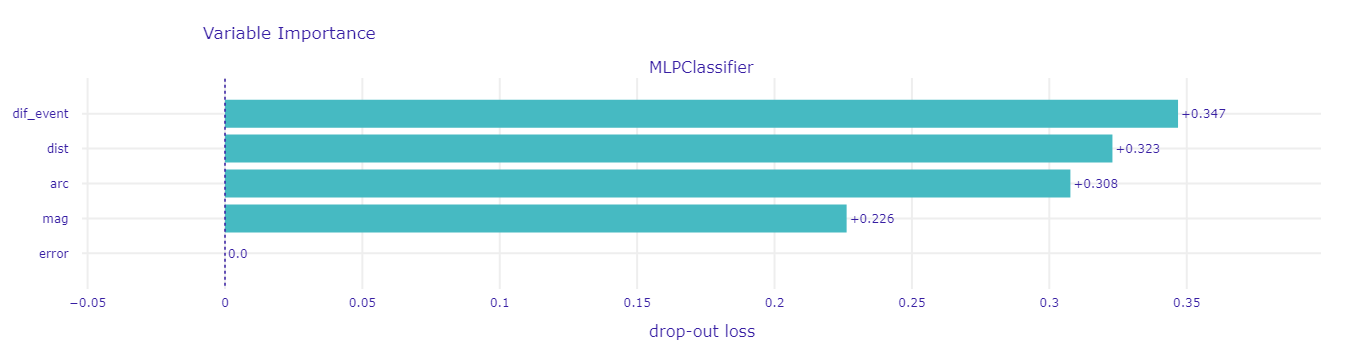

In [201]:
vi = exp.model_parts()
vi.result
vi.plot(max_vars=5)

In [205]:
pdp_num = exp.model_profile(type = 'partial', label="pdp")
ale_num = exp.model_profile(type = 'accumulated', label="ale")

Calculating accumulated dependency: 100%|████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.79it/s]


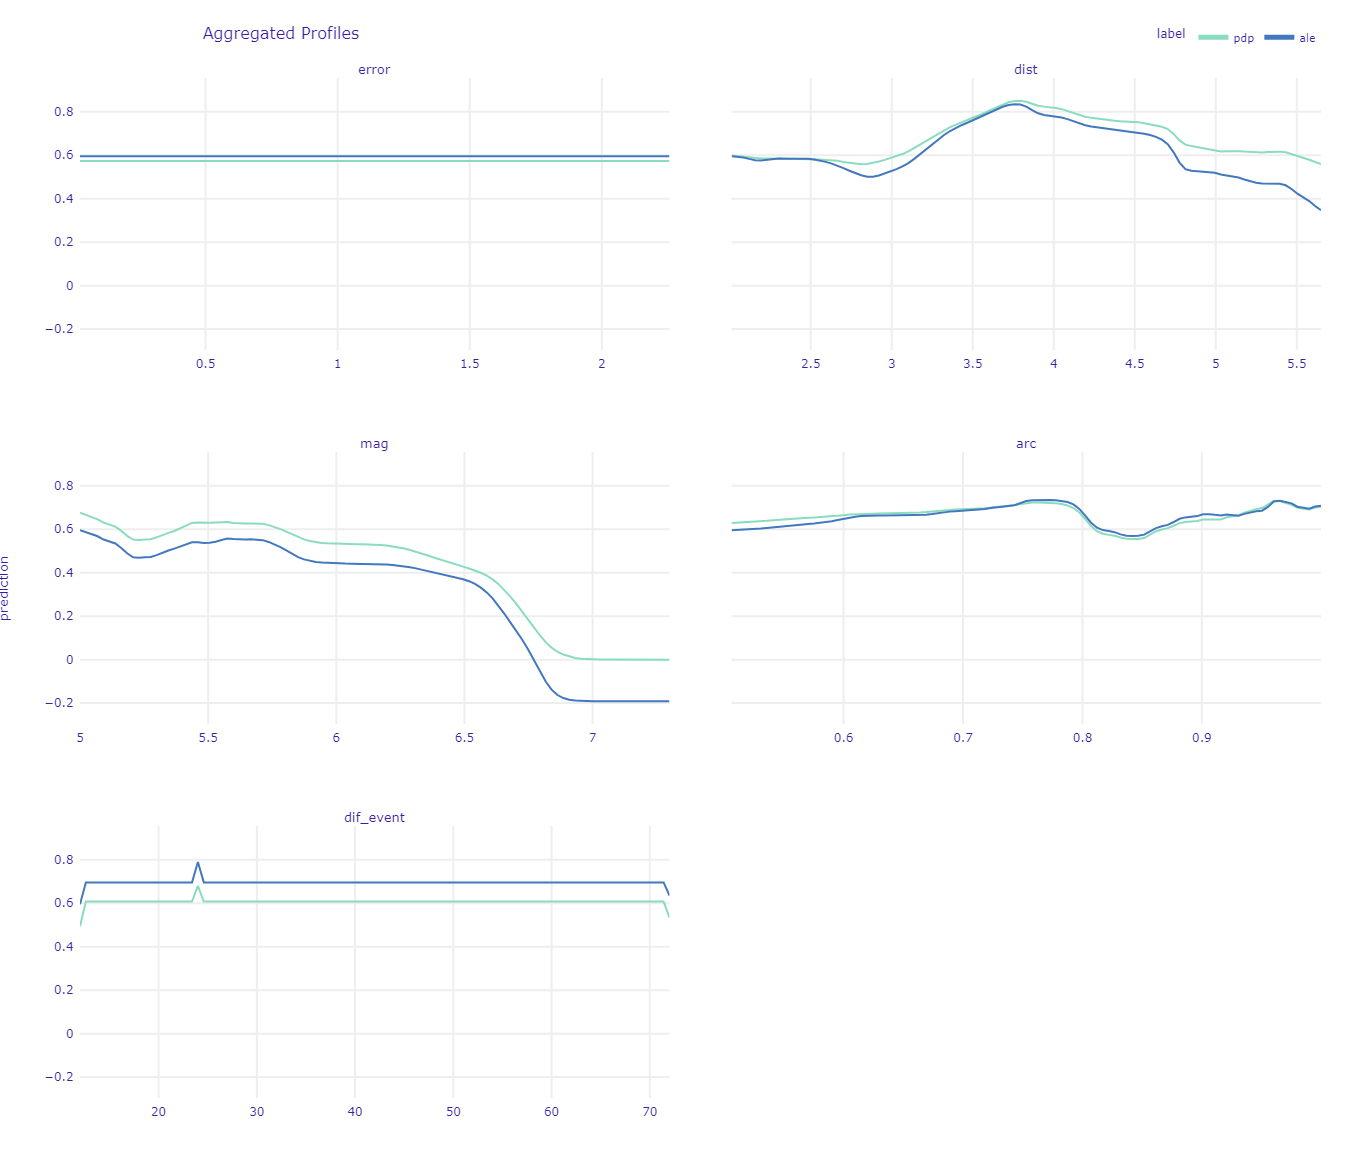

In [206]:
pdp_num.plot(ale_num)

In [76]:
path_list = list(Path(dir_path).rglob("*.csv"))
current_file = path_list[1]

df

NameError: name 'Path' is not defined

In [ ]:
df = NPw.get_metrics_from_folder("../Result/server")

In [60]:
df = df.loc[(df["ref"] == -12) | (df["ref"] == 72.0)]
NPw.print_df(df)

,ref,correct_class,predicted_class,type,diff_metrics,n_classes
date,,,,,,
2017-01-03 02:30:00,72.0,0,1,FP,0.206315,2
2017-01-06 14:30:00,-12.0,1,1,TP,0.000000,2
2017-02-27 11:00:00,72.0,0,0,TN,0.000000,2
2017-06-04 09:00:00,72.0,0,0,TN,0.000000,2
2017-06-07 21:00:00,-12.0,1,1,TP,0.000000,2
2017-07-12 20:30:00,72.0,0,1,FP,0.053078,2
2017-07-16 08:30:00,-12.0,1,1,TP,0.000000,2
2017-08-02 12:00:00,-12.0,1,0,FN,0.000704,2
2017-09-01 22:30:00,-12.0,1,0,FN,0.000036,2


In [ ]:
offset_model = [timedelta(current_offset) for current_offset in offset_model]

In [30]:
from dateutil.relativedelta import *

days = datetime.fromisoformat("2017-01-01T10:00:00")
n_dates = 8
offset_hours = [-3 * 24, 12, 24]
event_offsets = [None, -timedelta(hours=12), -timedelta(hours=24)]
for index_delta in range(n_dates):
    start_date = days + index_delta * relativedelta(months=+6)
    print(start_date)
    event_date = NPw_o.get_next_event(start_date)
    # print("EVENT: " + str(event_date))
    for offset_hour in offset_hours:
        current_date = event_date + relativedelta(hours=+offset_hour)
        # print("Current date: " + str(event_date))
        for event_offset in event_offsets:
            # print("EVENT: " + str(event_date) + " date: " + str(current_date) + " Offset: " + str(event_offset))
            config_fc = ConfigForecast(
                start_forecast=current_date, offset_event=event_offset
            )

            # NPw_o.add_forecast(config_fc)
            # NPw_o.save_df()

2017-01-01 10:00:00
2017-07-01 10:00:00
2018-01-01 10:00:00
2018-07-01 10:00:00
2019-01-01 10:00:00
2019-07-01 10:00:00
2020-01-01 10:00:00
2020-07-01 10:00:00


In [14]:
NPw_o = NPw.load_class("backup/gold_beetle")

RuntimeError: Invalid magic number; corrupt file?

In [8]:
import io
import pickle

# Use the pure-Python version, we can't see the internal state of the C version
pickle.Unpickler = pickle._Unpickler

import dill


unpickler = dill.Unpickler(handle)

try:
    unpickler.load()
except EOFError:
    pass

print(unpickler.stack)

ModuleNotFoundError: No module named 'dill'

In [14]:
cases = [None, -timedelta(hours=12), -timedelta(hours=24)]

for case in cases:
    config_fc = ConfigForecast(start_forecast=dt_event, offset_event=case)
    NPw_o.add_forecast(config_fc)
    NPw_o.save_class()

Training: 0it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

Predicting: 1416it [00:00, ?it/s]

In [16]:
NPw_o.npw_df

,start_forecast,n_samples,offset_model,train_metrics,test_metrics,actual_event,expected_event
endless-de,2017-01-18 09:00:00,184500,NaT,MAE RMSE Loss RegLoss epo...,"{'RMSE': 0.8663643, 'MSE': 0.84506387, 'MAE': ...",-514.0,NaN
molecular-tracie,2017-01-18 09:00:00,184500,-1 days +12:00:00,MAE RMSE Loss RegLoss epo...,"{'RMSE': 1.0112967, 'MSE': 1.1139989, 'MAE': 0...",-12.0,-12.0
quaint-muire,2017-01-18 09:00:00,184500,-1 days +12:00:00,MAE RMSE Loss RegLoss epo...,"{'RMSE': 0.88642025, 'MSE': 0.8833735, 'MAE': ...",-12.0,-12.0


In [ ]:
import pickle

file_name = "std1.pkl"
with open(file_name, "wb") as file:
    pickle.dump(NPw_o, file)
    print(f'Object successfully saved to "{file_name}"')

In [ ]:
with open(file_name, "rb") as file:
    NPw_i = pickle.load(file)

In [52]:
NPw_i.npw_df

,start_forecast,offset_model,ConfigForecast,events,train_metrics,test_metrics,actual_event,expected_event
coffee-cat,2016-03-01 10:00:00,-1 days +12:00:00,ConfigForecast(start_forecast=datetime.datetim...,467 2016-01-10 17:30:00 987 2016-01-21 1...,MAE RMSE Loss RegLoss epo...,"{'RMSE': 0.97724885, 'MSE': 1.1077031, 'MAE': ...",-12.0,-12.0


In [63]:
NPw_o.one_step_test()

AttributeError: 'NoneType' object has no attribute 'predict'

In [68]:
current_row = NPw_o.npw_df.loc["coffee-mite"]
save(current_row.loc["model"], "here.np")

ReferenceError: weakly-referenced object no longer exists

In [65]:
NPw_o.npw_df

,start_forecast,offset_model,model,ConfigForecast,events,df_train,df_test,is_fit,train_metrics,test_metrics
coffee-mite,2016-03-01 10:00:00,0 days 12:00:00,<neuralprophet.forecaster.NeuralProphet object...,ConfigForecast(start_forecast=datetime.datetim...,467 2016-01-10 17:30:00 987 2016-01-21 1...,ds y ID EV 0...,ds y ID EV 0 ...,True,MAE RMSE Loss RegLoss epo...,0.917511


In [3]:
# Select EQ -> Move to AutoTuning
dist_start = 5000
dist_delta = 3000
dist_max = 9000
lat_max = 360
arc_max = 75
mag_start = 5.5
mag_delta = 1.5
dist_perct = 1000

[earthquake, earthquake_raw, _] = get_eq_filtered(
    df["dist"],
    df["mag"],
    df["lat"],
    df["arc"],
    dist_start,
    dist_delta,
    dist_max,
    lat_max,
    arc_max,
    mag_start,
    mag_delta,
    dist_perct,
    1,
    1,
    SR_SENSORS.NS,
);

WARNING - (py.warnings._showwarnmsg) - C:\Users\Asus Rog\dev\Manchester\SR\aux_function_SR.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mag[discarted] = np.nan

WARNING - (py.warnings._showwarnmsg) - C:\Users\Asus Rog\dev\Manchester\SR\aux_function_SR.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist[discarted] = np.nan



In [60]:
NPw_o.save_class("model/first_version")

coffee-mite


ReferenceError: weakly-referenced object no longer exists

Object successfully saved to "std1.pkl"


In [18]:
with open(file_name, "rb") as file:
    NPw_i = pickle.load(file)

In [116]:
for index in NPw_o.npw_df.index:
    print(index)
    NPw_o.npw_df.at[index, "is_fit"] = True

Saanvi


In [8]:
for index in NPw_o.npw_df.index:
    print(NPw_o.npw_df.loc[index]["is_fit"])

True


In [128]:
# Convert from wide format to long format df
def multivariate_df(df):

    var_names = list(df)[1:]
    mv_df = pd.DataFrame()
    for col in var_names:
        aux = df[["ds", col]].copy(deep=True)  # select column associated with region
        aux = aux.iloc[:, :].copy(
            deep=True
        )  # selects data up to 26301 row (2004 to 2007 time stamps)
        aux = aux.rename(
            columns={col: "y"}
        )  # rename column of data to 'y' which is compatible with Neural Prophet
        aux["ID"] = col
        mv_df = pd.concat((mv_df, aux))
    return mv_df


def NeuralProphet_model():
    trainer_config = {"accelerator": "gpu"}
    m = NeuralProphet(
        n_forecasts=48,
        growth="off",
        daily_seasonality=True,
        yearly_seasonality=True,
        weekly_seasonality=False,
        n_lags=5 * 48,
        num_hidden_layers=2,
        d_hidden=16,
        learning_rate=0.01,
        trainer_config=trainer_config,
    )
    m.set_plotting_backend("plotly")
    return m


def add_eq_neural_prophet(m, df, events_eq):
    # Create EQ dataframe
    df_EQ = pd.DataFrame({"event": "EQ", "ds": events_eq})
    m = m.add_events(["EQ"])
    history_df = m.create_df_with_events(df, df_EQ)
    return (m, history_df)


def define_test(df_regrresor, events_eq, next_dt, offset_eq_forecast):
    long_df = multivariate_df(df_regressor)

    loc_eq = np.where(events_eq > next_dt)[0][0]
    current_eq_dt = events_eq[loc_eq]
    print(loc_eq)
    question_mark_span = timedelta(hours=24)
    # Insert EQ cases
    start_forecast_time = current_eq_dt + offset_eq_forecast
    question_mark_start = start_forecast_time - question_mark_span
    # Takes events up to that point
    # Three cases

    base_df = long_df[long_df["ds"] < start_forecast_time + timedelta(hours=24)]

    # 1- Training with no EartQuake
    model_1 = NeuralProphet_model()
    # Remove all EQ after question_mark_start
    events_eq_1 = events_eq[events_eq < question_mark_start]

    (model_1, history_df_1) = add_eq_neural_prophet(model_1, base_df, events_eq_1)
    df_train_1, df_test_1 = model_1.split_df(
        history_df_1, valid_p=1, freq="30min", local_split=True
    )

    # 2- Training with an EarthQuake 12 hours ago
    model_2 = NeuralProphet_model()
    # Remove all EQ after question_mark_start
    events_eq_2 = events_eq[events_eq < question_mark_start]
    events_eq_2 = events_eq_2.insert(
        len(events_eq_2), start_forecast_time - timedelta(hours=12)
    )
    (model_2, history_df_2) = add_eq_neural_prophet(model_2, base_df, events_eq_2)
    df_train_2, df_test_2 = model_2.split_df(
        history_df_2, valid_p=1, freq="30min", local_split=True
    )

    # 3- Training with an EarthQuake 24 hours ago
    model_3 = NeuralProphet_model()
    # Remove all EQ after question_mark_start
    events_eq_3 = events_eq[events_eq < question_mark_start]
    events_eq_3 = events_eq_3.insert(
        len(events_eq_3), start_forecast_time - timedelta(hours=24)
    )
    (model_3, history_df_3) = add_eq_neural_prophet(model_3, base_df, events_eq_3)
    df_train_3, df_test_3 = model_3.split_df(
        history_df_3, valid_p=1, freq="30min", local_split=True
    )

    model_list = [model_1, model_2, model_3]
    history_df_list = [history_df_1, history_df_2, history_df_3]
    df_train_list = [df_train_1, df_train_2, df_train_3]
    df_test_list = [df_test_1, df_test_2, df_test_3]
    events_eq_list = [events_eq_1, events_eq_2, events_eq_3]
    return (model_list, df_train_list, df_test_list, events_eq_list)


def fit_models(model_list, df_train_list, df_test_list, events_eq_list):
    metrics_list = list()
    model_list_new = list()
    for (model, df_train, df_test, events_eq) in zip(
        model_list, df_train_list, df_test_list, events_eq_list
    ):
        metrics = model.fit(df_train)
        metrics_list.append(metrics)
        model_list_new.append(model)

    return (model_list_new, metrics_list)


def test_models(model_list, df_train_list, df_test_list, events_eq_list):
    metrics_list = list()
    for model, df_test in zip(model_list, df_test_list):
        metric = model.test(df_test)
        metrics_list.append(metric)
    return metrics_list


def one_step_test(model_list, df_train_list, df_test_list, events_eq_list):
    mse = list()
    for model, df_test in zip(model_list, df_test_list):
        future = model.make_future_dataframe(df_test, n_historic_predictions=0)
        forecast = model.predict(future, decompose=False, raw=True)
        y_predicted = forecast.filter(like="step").to_numpy()
        y_actual = (
            pd.pivot(df_test, index="ds", columns="ID", values="y")[-48:]
            .transpose()
            .to_numpy()
        )
        mse.append(mean_squared_error(y_actual, y_predicted))
    return mse

In [30]:
one_step_test(
    model_list_new_2017_12,
    df_train_list_2017_12,
    df_test_list_2017_12,
    events_eq_list_2017_12,
)

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

[0.6282831, 0.5236542, 0.52741766]

In [28]:
model_list_new_2017_12

In [24]:
pd.DataFrame(
    {
        "model": model_list_new_2017_12,
        "df_train": df_train_list_2017_12,
        "df_test": df_train_list_2017_12,
    }
)

,model,df_train
0,<neuralprophet.forecaster.NeuralProphet object...,ds y ID EQ ...
1,<neuralprophet.forecaster.NeuralProphet object...,ds y ID EQ ...
2,<neuralprophet.forecaster.NeuralProphet object...,ds y ID EQ ...


In [129]:
last_eq_dt_2017 = "2018-01-01 10:00:00"
offset = timedelta(hours=12)
(
    model_list_2017_12,
    df_train_list_2017_12,
    df_test_list_2017_12,
    events_eq_list_2017_12,
) = define_test(df_regressor, events_eq, last_eq_dt_2017, offset)

124


In [6]:
(model_list_new_2017_12, metrics_train_list_12) = fit_models(
    model_list_2017_12,
    df_train_list_2017_12,
    df_test_list_2017_12,
    events_eq_list_2017_12,
)
metrics_list_2017_12 = one_step_test(
    model_list_new_2017_12,
    df_train_list_2017_12,
    df_test_list_2017_12,
    events_eq_list_2017_12,
)

2018-01-04 10:30:00


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.0056582423858344555   │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.005612048786133528    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.005652005784213543    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

In [31]:
last_eq_dt_2017 = "2018-01-01 10:00:00"
offset = timedelta(hours=24)
(
    model_list_2017_24,
    df_train_list_2017_24,
    df_test_list_2017_24,
    events_eq_list_2017_24,
) = define_test(df_regressor, events_eq, last_eq_dt_2017, offset)
(model_list_new_2017_24, metrics_train_list_24) = fit_models(
    model_list_2017_24,
    df_train_list_2017_24,
    df_test_list_2017_24,
    events_eq_list_2017_24,
)
metrics_list_2017_24 = one_step_test(
    model_list_new_2017_24,
    df_train_list_2017_24,
    df_test_list_2017_24,
    events_eq_list_2017_24,
)

2018-01-04 10:30:00


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

Predicting: 2736it [00:00, ?it/s]

In [32]:
metrics_list_2017_24

[0.51300144, 0.5120215, 0.5104267]

In [ ]:
metrics_list_2017_12 = test_models(
    model_list_new_2017_12,
    df_train_list_2017_12,
    df_test_list_2017_12,
    events_eq_list_2017_12,
)

In [8]:
(model_list_new_2017_12, metrics_list_12) = fit_models(
    model_list_2017_12,
    df_train_list_2017_12,
    df_test_list_2017_12,
    events_eq_list_2017_12,
)

In [10]:
metrics_list_2017_12 = test_models(
    model_list_new_2017_12,
    df_train_list_2017_12,
    df_test_list_2017_12,
    events_eq_list_2017_12,
)

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.008815927430987358    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.008940164931118488    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.008813655003905296    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

In [12]:
last_eq_dt_2017 = "2017-01-01 10:00:00"
offset = timedelta(hours=24)
(
    model_list_2017_24,
    df_train_list_2017_24,
    df_test_list_2017_24,
    events_eq_list_2017_24,
) = define_test(df_regressor, events_eq, last_eq_dt_2017, offset)

2017-01-18 09:00:00


In [ ]:
(model_list_new_2017_24, metrics_list_24) = fit_models(
    model_list_2017_24,
    df_train_list_2017_24,
    df_test_list_2017_24,
    events_eq_list_2017_24,
)
metrics_list_2017_24 = test_models(
    model_list_new_2017_24,
    df_train_list_2017_24,
    df_test_list_2017_24,
    events_eq_list_2017_24,
)

2017-01-18 09:00:00


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [10]:
with open("model/neuralprophet_model_list_new_2017_12.pkl", "rb") as f:
    model_list_new_2017_12 = pickle.load(f)
with open("model/neuralprophet_model_list_new_2017_24.pkl", "rb") as f:
    model_list_new_2017_24 = pickle.load(f)

In [151]:
with open("model/neuralprophet_model_list_new_2017_24.pkl", "wb") as f:
    # dump information to that file
    pickle.dump(model_list_new_2017_24, f)

with open("model/neuralprophet_model_list_new_2017_12.pkl", "wb") as f:
    # dump information to that file
    pickle.dump(model_list_new_2017_12, f)

In [88]:
metrics_list_2017_24 = test_models(
    model_list_new_2017_24,
    df_train_list_2017_24,
    df_test_list_2017_24,
    events_eq_list_2017_24,
)

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.010402834974229336    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.010616637766361237    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.014465972781181335    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

In [ ]:
from neuralprophet import save
    save(m, "test_save_model.np")
    

In [17]:
from neuralprophet import load

model_list_new_2017_24[2] = load("test_save_model.np")

In [8]:
m = model_list_new_2017_12[2]
print(m)
current_df = df_test_list_2017_12[2]
df_S0 = current_df[current_df["ID"] == "S0"]
print(df_S0[-48:-40])
print(events_eq_list_2017_12[0][-1])
print(events_eq_list_2017_12[1][-1])
print(events_eq_list_2017_12[2][-1])

                     ds         y  ID   EQ
240 2018-01-04 22:30:00  0.052278  S0  0.0
241 2018-01-04 23:00:00  0.070255  S0  0.0
242 2018-01-04 23:30:00  0.049654  S0  0.0
243 2018-01-05 00:00:00  0.054964  S0  0.0
244 2018-01-05 00:30:00  0.038026  S0  0.0
245 2018-01-05 01:00:00  0.046670  S0  0.0
246 2018-01-05 01:30:00  0.042481  S0  0.0
247 2018-01-05 02:00:00  0.057397  S0  0.0
2017-12-16 14:30:00
2018-01-04 10:30:00
2018-01-03 22:30:00


In [9]:
print(m.test(current_df))

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.005652005784213543    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

   Loss_test  RegLoss_test
0   0.005652           0.0


In [10]:
current_df = df_test_list_2017_12[1]
w_df = (
    pd.pivot(current_df, index="ds", columns="ID", values="y")[-48:]
    .transpose()
    .to_numpy()
)
y_actual = w_df

In [11]:
future = m.make_future_dataframe(current_df, n_historic_predictions=0)
future = future
forecast = m.predict(future, decompose=False, raw=True)
y_predicted = forecast.filter(like="step").to_numpy()

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

In [19]:
from sklearn.metrics import mean_squared_error

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

0.6282831


Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

0.5236542


Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

0.52741766


In [15]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([3, -0.5, 2, 7])
mean_squared_error(y_true, y_pred)

0.0

In [45]:
future = m.make_future_dataframe(current_df, n_historic_predictions=0)
forecast = m.predict(future)
latest = m.fcst_df_to_latest_forecast(forecast)

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

Predicting: 1419it [00:00, ?it/s]

AttributeError: 'NeuralProphet' object has no attribute 'fcst_df_to_latest_forecast'

In [56]:
from neuralprophet.utils import fcst_df_to_latest_forecast

m = m.highlight_nth_step_ahead_of_each_forecast(None)  # reset highlight
# fig = m.plot_last_forecast(forecast)
df_forecast = fcst_df_to_latest_forecast(forecast, [0.5, 0.6])
df_forecast

IndexError: index 0 is out of bounds for axis 1 with size 0

In [9]:
last_eq_dt_2018 = "2018-01-01 10:00:00"
(
    model_list_2018,
    df_train_list_2018,
    df_test_list_2018,
    events_eq_list_2018,
) = define_test(df_regressor, events_eq, last_eq_dt_2018)
(model_list_new_2017, metrics_list) = fit_models(
    model_list_2018, df_train_list_2018, df_test_list_2018, events_eq_list_2018
)
metrics_list_2018 = test_models(
    model_list_new_2018, df_train_list_2018, df_test_list_2018, events_eq_list_2018
)


last_eq_dt_2019 = "2019-01-01 10:00:00"
(
    model_list_2019,
    df_train_list_2019,
    df_test_list_2019,
    events_eq_list_2019,
) = define_test(df_regressor, events_eq, last_eq_dt_2019)
(model_list_new_2019, metrics_list) = fit_models(
    model_list_2019, df_train_list_2019, df_test_list_2019, events_eq_list_2019
)
metrics_list_2019 = test_models(
    model_list_new_2019, df_train_list_2019, df_test_list_2019, events_eq_list_2019
)

last_eq_dt_2020 = "2020-01-01 10:00:00"
(
    model_list_2020,
    df_train_list_2020,
    df_test_list_2020,
    events_eq_list_2020,
) = define_test(df_regressor, events_eq, last_eq_dt_2020)
(model_list_new_2020, metrics_list) = fit_models(
    model_list_2020, df_train_list_2020, df_test_list_2020, events_eq_list_2020
)
metrics_list_2020 = test_models(
    model_list_new_2020, df_train_list_2020, df_test_list_2020, events_eq_list_2020
)

2017-01-18 09:00:00


Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

NameError: name 'test_models' is not defined

In [ ]:
(model_list_new, metrics_list) = fit_models(
    model_list, df_train_list, df_test_list, events_eq_list
)

Training: 0it [00:00, ?it/s]

In [117]:
metrics_list = test_models(model_list_new, df_train_list, df_test_list, events_eq_list)

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.008850055746734142    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.010578270070254803    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │   0.008758272975683212    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

In [127]:
current_df = df_test_list[1]
df_S0 = current_df[current_df["ID"] == "S0"]
print(df_S0[:48])
print(events_eq_list[0][-1])
print(events_eq_list[1][-1])
print(events_eq_list[2][-1])

                    ds         y  ID   EQ
0  2017-01-12 21:30:00  0.017907  S0  0.0
1  2017-01-12 22:00:00  0.022204  S0  0.0
2  2017-01-12 22:30:00  0.016407  S0  0.0
3  2017-01-12 23:00:00  0.023247  S0  0.0
4  2017-01-12 23:30:00  0.061760  S0  0.0
5  2017-01-13 00:00:00  0.047801  S0  0.0
6  2017-01-13 00:30:00  0.058413  S0  0.0
7  2017-01-13 01:00:00  0.047685  S0  0.0
8  2017-01-13 01:30:00  0.072957  S0  0.0
9  2017-01-13 02:00:00  0.059106  S0  0.0
10 2017-01-13 02:30:00  0.070046  S0  0.0
11 2017-01-13 03:00:00  0.052481  S0  0.0
12 2017-01-13 03:30:00  0.066990  S0  0.0
13 2017-01-13 04:00:00  0.044220  S0  0.0
14 2017-01-13 04:30:00  0.053052  S0  0.0
15 2017-01-13 05:00:00  0.017109  S0  0.0
16 2017-01-13 05:30:00  0.035394  S0  0.0
17 2017-01-13 06:00:00  0.048093  S0  0.0
18 2017-01-13 06:30:00  0.043330  S0  0.0
19 2017-01-13 07:00:00  0.052967  S0  0.0
20 2017-01-13 07:30:00  0.051366  S0  0.0
21 2017-01-13 08:00:00  0.045414  S0  0.0
22 2017-01-13 08:30:00  0.001805  

In [90]:
future = model_list_new_2018[0].make_future_dataframe(
    df_test_1, periods=24, n_historic_predictions=False
)
print(future)
forecast = model_list_new_2018[0].predict(future, raw=False)
model_list_new_2018[0].test(df_test_1)

# fig = model_list_new_2018[0].plot(forecast[forecast["ID"] == "S1"])

                      ds         y  ID   EQ
0    2017-12-31 22:30:00 -0.017169  S0  0.0
1    2017-12-31 23:00:00 -0.017675  S0  0.0
2    2017-12-31 23:30:00 -0.026311  S0  0.0
3    2018-01-01 00:00:00 -0.019782  S0  0.0
4    2018-01-01 00:30:00  0.010604  S0  0.0
...                  ...       ...  ..  ...
2875 2018-01-06 20:00:00       NaN  S9  0.0
2876 2018-01-06 20:30:00       NaN  S9  0.0
2877 2018-01-06 21:00:00       NaN  S9  0.0
2878 2018-01-06 21:30:00       NaN  S9  0.0
2879 2018-01-06 22:00:00       NaN  S9  0.0

[2880 rows x 4 columns]


Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Loss_test         │    0.00613833824172616    │
│       RegLoss_test        │            0.0            │
└───────────────────────────┴───────────────────────────┘

,Loss_test,RegLoss_test
0,0.006138,0.0


In [89]:
df_test_1

,ds,y,ID,EQ
0,2017-12-29 23:00:00,-0.007716,S0,0.0
1,2017-12-29 23:30:00,-0.003185,S0,0.0
2,2017-12-30 00:00:00,-0.012593,S0,0.0
3,2017-12-30 00:30:00,-0.004202,S0,0.0
4,2017-12-30 01:00:00,-0.000157,S0,0.0
...,...,...,...,...
3345,2018-01-05 20:00:00,-0.067881,S9,0.0
3346,2018-01-05 20:30:00,-0.119288,S9,0.0
3347,2018-01-05 21:00:00,0.138208,S9,0.0
3348,2018-01-05 21:30:00,-0.184494,S9,0.0


In [67]:
forecast.head(2).loc[:, forecast.head(1).columns.str.contains("step")]
raw_false = forecast[forecast["ID"] == "S1"]
raw_false = raw_false[raw_false["ds"] > "2018-01-04 10:30:00"]
print(raw_false)

                     ds         y  ID     yhat1     yhat2     yhat3     yhat4  \
647 2018-01-04 11:00:00  0.678346  S1  0.280392  0.347550 -0.552515 -0.198142   
648 2018-01-04 11:30:00  0.087850  S1  0.368182  0.326992  0.408569 -0.445682   
649 2018-01-04 12:00:00  0.253680  S1  0.277396  0.387923  0.365467  0.450311   
650 2018-01-04 12:30:00  0.424104  S1  0.299824  0.267171  0.390915  0.376965   
651 2018-01-04 13:00:00  0.523761  S1  0.335269  0.254109  0.239491  0.367296   
..                  ...       ...  ..       ...       ...       ...       ...   
761 2018-01-06 20:00:00       NaN  S1       NaN       NaN       NaN       NaN   
762 2018-01-06 20:30:00       NaN  S1       NaN       NaN       NaN       NaN   
763 2018-01-06 21:00:00       NaN  S1       NaN       NaN       NaN       NaN   
764 2018-01-06 21:30:00       NaN  S1       NaN       NaN       NaN       NaN   
765 2018-01-06 22:00:00       NaN  S1       NaN       NaN       NaN       NaN   

        yhat5     yhat6    

In [18]:
# Python
from neuralprophet.serialize import model_to_json, model_from_json

current_model = model_list[0]
with open("serialized_model.json", "w") as fout:
    fout.write(model_to_json(current_model))  # Save model

with open("serialized_model.json", "r") as fin:
    current_model = model_from_json(fin.read())  # Load model

ModuleNotFoundError: No module named 'neuralprophet.serialize'

In [40]:
import pickle

with open("model/neuralprophet_model.pkl", "wb") as f:
    # dump information to that file
    pickle.dump(m2, f)

ValueError: I/O operation on closed file.

In [ ]:
with open("neuralprophet_model.pkl", "wb") as f:
    pickle.dump(model_list[0], f)

ValueError: I/O operation on closed file.

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.653% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.653% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T


Predicting: 1093it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.plot) - Too few forecasts to plot a line per forecast step.Plotting a line per forecast origin instead.


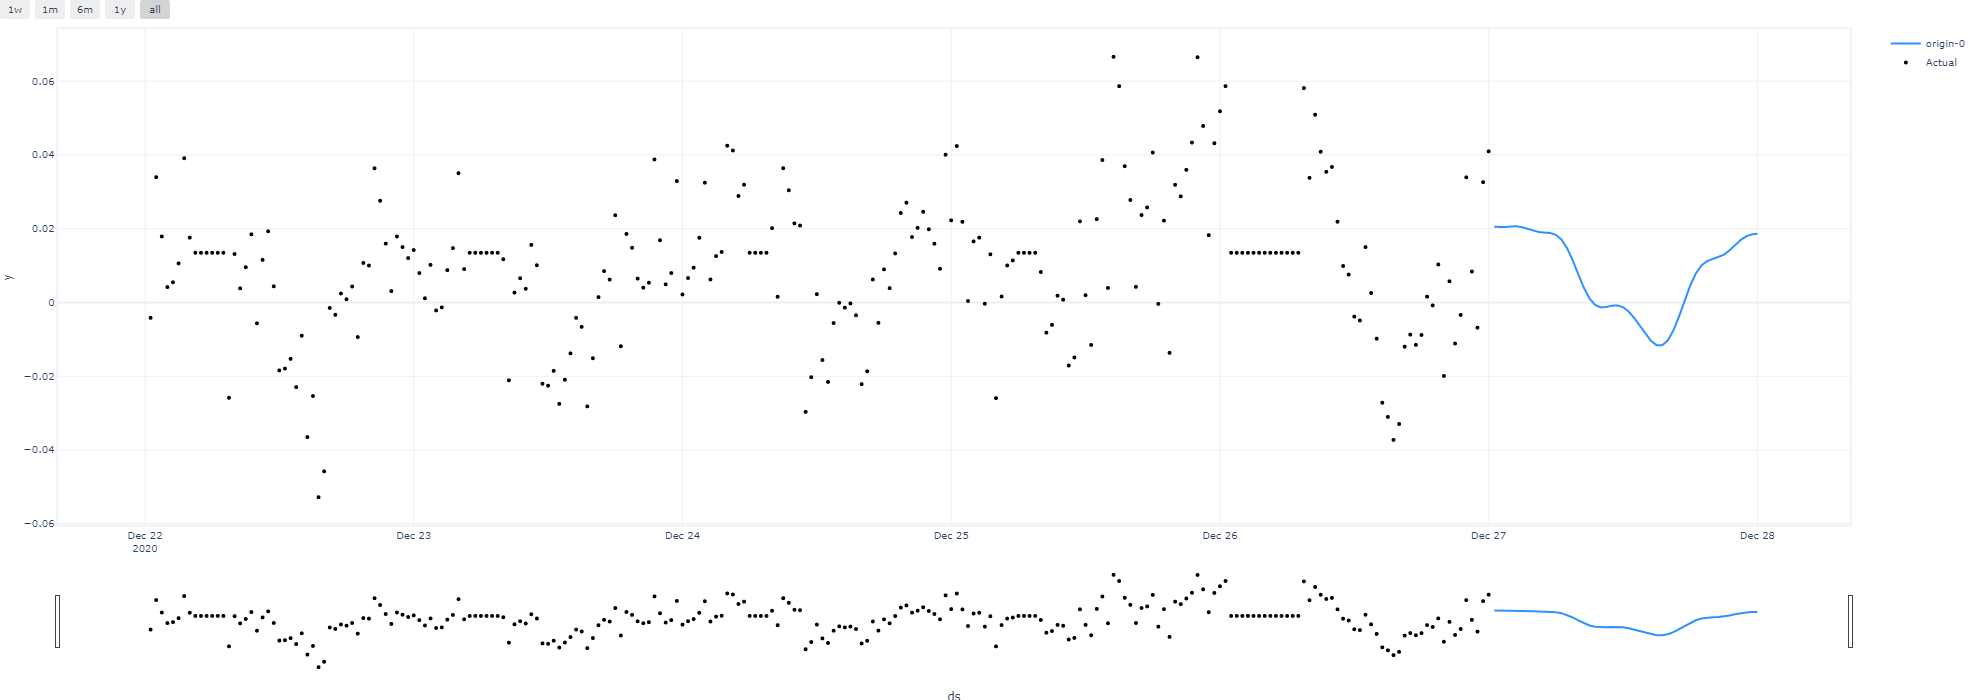

In [38]:
m.set_plotting_backend("plotly")
forecast = m.predict(future)
fig = m.plot(forecast, figsize=(30, 10))
fig

In [17]:
for col in forecast.columns:
    print(col)

ds
y
yhat1
yhat2
yhat3
yhat4
yhat5
yhat6
yhat7
yhat8
yhat9
yhat10
yhat11
yhat12
yhat13
yhat14
yhat15
yhat16
yhat17
yhat18
yhat19
yhat20
yhat21
yhat22
yhat23
yhat24
yhat25
yhat26
yhat27
yhat28
yhat29
yhat30
yhat31
yhat32
yhat33
yhat34
yhat35
yhat36
yhat37
yhat38
yhat39
yhat40
yhat41
yhat42
yhat43
yhat44
yhat45
yhat46
yhat47
yhat48
ar1
ar2
ar3
ar4
ar5
ar6
ar7
ar8
ar9
ar10
ar11
ar12
ar13
ar14
ar15
ar16
ar17
ar18
ar19
ar20
ar21
ar22
ar23
ar24
ar25
ar26
ar27
ar28
ar29
ar30
ar31
ar32
ar33
ar34
ar35
ar36
ar37
ar38
ar39
ar40
ar41
ar42
ar43
ar44
ar45
ar46
ar47
ar48
trend
season_yearly
season_daily


INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 48.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.702% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.702% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T


Predicting: 1093it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


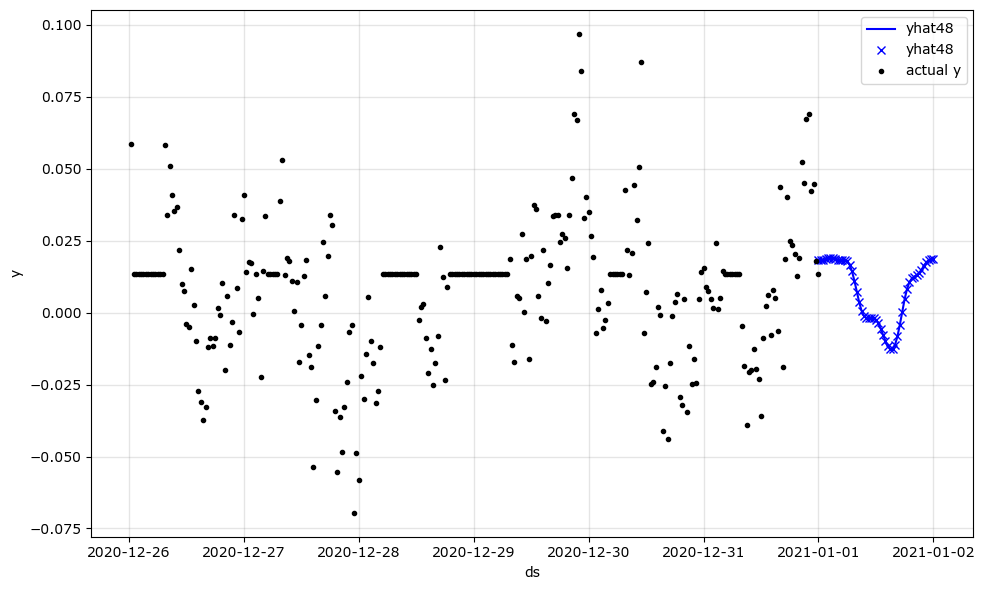

In [13]:
future = m.make_future_dataframe(df_test, periods=24, n_historic_predictions=48)
forecast = m.predict(future)
fig = m.plot(forecast)

In [35]:
forecast = m.predict(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T


Predicting: 1093it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [ ]:
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()

In [ ]:
fig_forecast = m.plot(forecast)

In [ ]:
metrics.tail(1)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


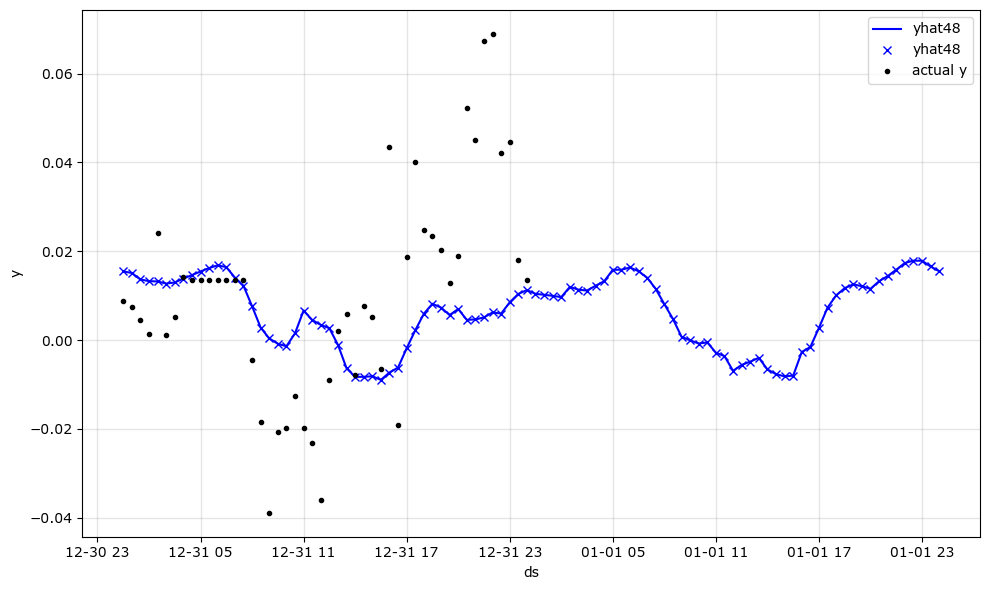

In [46]:
m = m.highlight_nth_step_ahead_of_each_forecast(48)
fig = m.plot(forecast[-48 * 2 :])

In [ ]:
future = m.make_future_dataframe(df_test, periods=400, n_historic_predictions=48)
forecast = m.predict(future)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.861% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.74% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T


Predicting: 1093it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.plot_last_forecast) - plot_last_forecast() has been renamed to plot_latest_forecast() and is therefore deprecated. Please use plot_latst_forecast() in the future
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


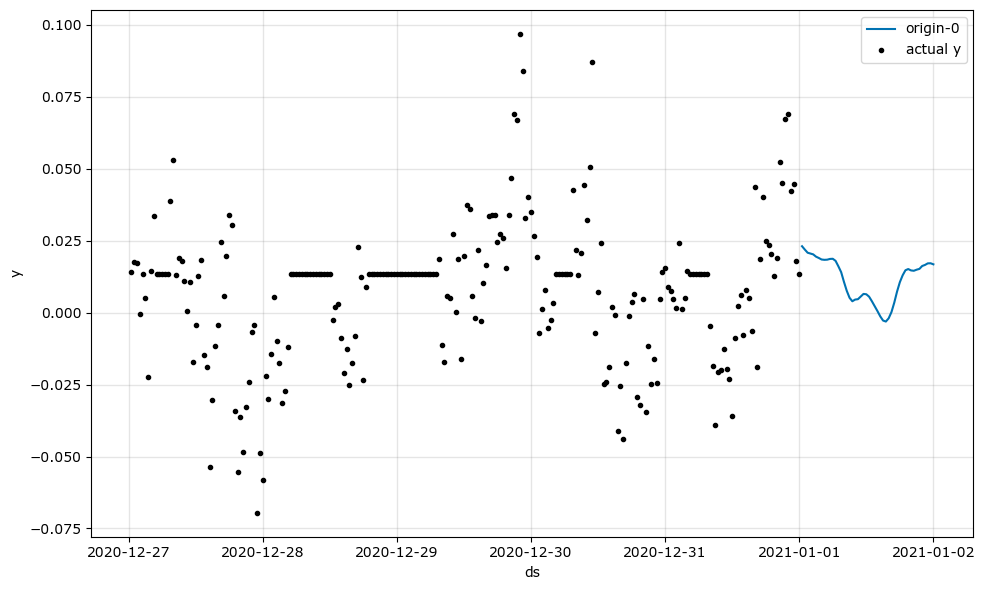

In [36]:
future = m.make_future_dataframe(df_test[-48 * 15 :], n_historic_predictions=48 * 2)
forecast = m.predict(future)
m = m.highlight_nth_step_ahead_of_each_forecast(None)  # reset highlight
fig = m.plot_last_forecast(forecast)

,ds,y
13343,2020-09-23 00:30:00,0.014324
13344,2020-09-23 01:00:00,0.004963
13345,2020-09-23 01:30:00,-0.038775
13346,2020-09-23 02:00:00,0.022857
13347,2020-09-23 02:30:00,-0.007387
...,...,...
18138,2020-12-31 22:00:00,0.068927
18139,2020-12-31 22:30:00,0.042157
18140,2020-12-31 23:00:00,0.044696
18141,2020-12-31 23:30:00,0.018072


WARNING - (NP.forecaster.plot_last_forecast) - plot_last_forecast() has been renamed to plot_latest_forecast() and is therefore deprecated. Please use plot_latst_forecast() in the future
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


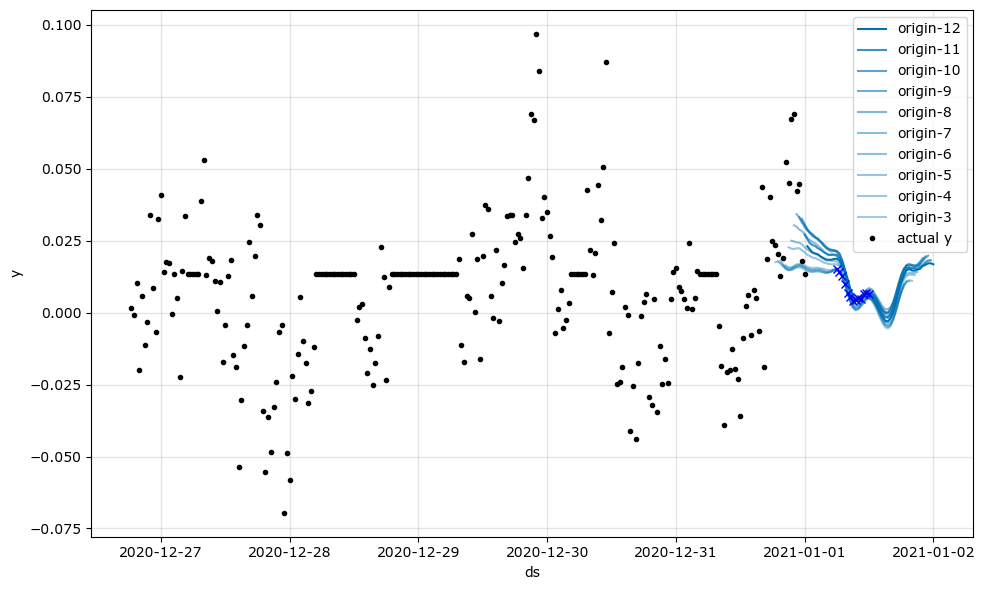

In [37]:
m = m.highlight_nth_step_ahead_of_each_forecast(2 * 12)
fig = m.plot_last_forecast(forecast, include_previous_forecasts=12)

WARNING - (NP.forecaster.plot) - Too few forecasts to plot a line per forecast step.Plotting a line per forecast origin instead.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Asus Rog\anaconda3\envs\NeuralProphet\lib\site-packages\neuralprophet\utils.py:600: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[rows, forecast_name] = last

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


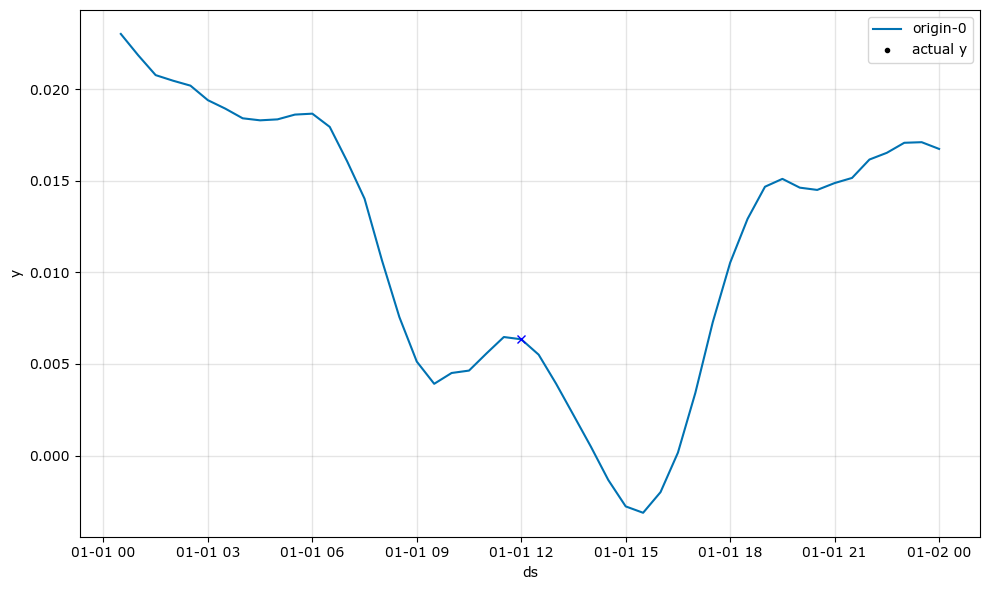

In [38]:
fig1 = m.plot(forecast[-48:])

In [41]:
trainer_config = {"accelerator": "gpu"}
m = NeuralProphet(
    n_forecasts=48,
    growth="off",
    weekly_seasonality=False,
    n_lags=5 * 48,
    num_hidden_layers=5,
    d_hidden=16,
    learning_rate=0.003,
    trainer_config=trainer_config,
)
m = m.add_lagged_regressor(names=other_regressors)  # , only_last_value=True)
df_train, df_test = m.split_df(df_neural, valid_p=0.2)
metrics = m.fit(df_train, validation_df=df_test)

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (240)
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.999% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.999% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 63


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]